# Amazfit Sync to Google Fit: Guide to data extraction and analysis

<div style="display:flex; flex-direction:column; justify-content:flex-center">
    <img src='https://i.imgur.com/mfIkwzu.jpeg' width="550">
</div>
<em>A picture of the <a href="https://www.amazfit.com/products/amazfit-gts-4-mini" target="_blank">Amazfit GTS 4 mini</a> smartwatch that was used for this notebook</em>

[Amazfit](https://www.amazfit.com/) is a brand of smartwatches and fitness trackers known for their long battery life, stylish designs, and variety of features  like sleep tracking and workout modes.

Prices for Amazfit smartwatches range from $500 for the [Amazfit Falcon](https://us.amazfit.com/collections/performance/products/amazfit-falcon) in the performance series to $50 for the [Amazfit Band 7](https://us.amazfit.com/collections/essential/products/amazfit-band-7) in the essentials series. With a wide variety of device options selling at varying price points makes Amazfit devices a more price convenient option to high end smartwatches such as the [Apple Watch Series](https://www.apple.com/shop/buy-watch/apple-watch) 9 (starting from $400 to $1,149) or the [Samsung Galaxy 4](https://www.samsung.com/us/watches/galaxy-watch4/buy/?modelCode=SM-R860NZDAXAA) (being the least at $200) They are typically more affordable than some other high-end smartwatches.<br/>

Zepp App [[Android](https://play.google.com/store/apps/details?id=com.huami.watch.hmwatchmanager&hl=en_US), [iOS](https://apps.apple.com/us/app/zepp-formerly-amazfit/id1127269366)](formerly Amazfit App), is the mobile application used to manage and configure Amazfit smartwatches and fitness trackers. It allows you to view your health data, customize settings, and update your device.<br/>

[Google Fit](https://www.google.com/fit/) is Google's version of Apple Health. It lets you track your fitness activity and health data from all of your wearable devices like Apple Watches, Samsung Galaxy Watches, Polar Smartwatches, etc. <br>

Google Fit is completely free. It also comes preloaded on Android Wear watches and can be downloaded from the [Apple App](http://itunes.apple.com/app/id1433864494) and [Google Play](https://play.google.com/store/apps/details?id=com.google.android.apps.fitness) stores.
<br/>
Although the Zepp app allows you to sync passively collected data and workout activities with your Amazfit (and Xiaomi on occasion) wearable devices, unlike Google devices running the Google Fit app, Amazfit smartwatches and fitness trackers do not have an accessible API to extract collected data. In order to gain access to the collected data; 
1. we first sync the Zepp app data to Google Fit
2. then make use of the Google Fitness API to extract this data

We've been using the Amazfit GTS smartwatch paired with Zepp which is in turn synced with the Google Fit application for the past few weeks and we will show you how to extract its data, visualize your activities and compute correlations between multiple metrics of the data. Google Fit categorizes its data types into three main groups:
1. Public Data Types: These standard types, prefixed with 'com.google' (e.g., com.google.step_count.delta), capture real-time health and wellness data such as fitness activities, sleep, and nutrition. They are accessible to any app with the necessary permissions, except for some location data types which are restricted to the app that created them.
2. Aggregate Data Types: These types provide aggregated health and wellness data by time or activity type.
3. Private Custom Data Types: Defined and accessed only by the app that created them.

Detailed information is available for specific categories like [Activity](https://developers.google.com/fit/datatypes/activity), [Location](https://developers.google.com/fit/datatypes/location), [Nutrition](https://developers.google.com/fit/datatypes/nutrition), and [Health data](https://developers.google.com/fit/datatypes/health) types, as well as for [Aggregate](https://developers.google.com/fit/datatypes/aggregate) and [Custom data types](https://developers.google.com/fit/datatypes/custom).

However, for this notebook, we will be focusing on the following metrics:
Data types | Sampling Frequency 
-------------------|------------------
Sleep Duration |  Daily
Activity Minutes|  Daily
Speed |  Daily
Energy Expended |  Daily
Steps |  Per Minute 
Calories Expended |  Per Minute
Heart Rate |  Every 5 seconds 
Weight | Daily

In this guide, we sequentially cover the following **nine** topics to extract data from the Google Fit servers:

1. **Set up**<br>
2. **Authentication with Google Fitness API**<br>
   - Requires access_token<br>
3. **Extract Amazfit health data from Google Fit API**<br>
  - We get data via Wearipedia using a couple lines of code<br>
4. **Extract Amazfit health data from Google Fit API**<br>
    - We export all of this data to file formats compatible by R, Excel, and MatLab.<br>
5. **Participant Adherence**<br>
    - We simulate non-adherence by dynamically removing datapoints from our simulated data.<br>
6. **Visualizing Participant Activity**<br>

Disclaimer: this notebook is purely for educational purposes. All of the data currently stored in this notebook is purely *synthetic*, meaning randomly generated according to rules we created. Despite this, the end-to-end data extraction pipeline has been tested on our own data, meaning that if you enter your own email and password on your own Colab instance, you can visualize your own *real* data. That being said, we were unable to thoroughly test the timezone functionality, though, since we only have one account, so beware.

# 1. Setup

## Setup Amazfit, Google Fit and Zepp app sync to Google Fit

Dear Participant,

Follow the instructions below to setup Amazfit synced to Google Fit.

1. Download the Zepp app from the [Google Play](https://play.google.com/store/apps/details?id=com.huami.watch.hmwatchmanager&hl=en&gl=US) store or [Apple Play](https://apps.apple.com/us/app/zepp-formerly-amazfit/id1127269366) store
2. Pair the Amazfit wearable device with your smartphone

Once you download the Google Fit app, please set it up by following these resources:
- Written guide: https://www.businessinsider.com/guides/tech/google-fit
- Video guide: https://www.youtube.com/watch?v=0GnBgqnRM60&ab_channel=UponTop

Make sure that your phone is logged to the google fit app using the Google Fit login credentials (email and password) given to you by the data receiver.

Once you have paired your wearable device with your Zepp app and Google Fit is setup on your smartphone, follow the steps in this guide to setup sync with Google Fit app: https://support.walkingspree.com/hc/en-us/articles/6288831122587-Connecting-your-Amazfit-Zepp-Smartwatch-to-Google-Fit-and-Apple-Health


The following steps should help a GMail user create an access token for the Google Fitness API using the OAuth 2.0 Playground web interface.

1. Visit the [OAuth 2.0 Playground](https://developers.google.com/oauthplayground/). In the Select & authorize APIs section, locate the Google Fitness API and click the dropdown next to it to reveal URLs to various activity data. Select the permissions you need; for this notebook we will only be reading data from the API so make sure you enable permissions for at least _steps, heart_rate, sleep, heart_minutes, calories_expended, activity_minutes, speed, weight and distance_. For example, to access step count data, you might choose https://www.googleapis.com/auth/fitness.activity.read. Then click on Authorize APIs.<br/>
<img src='https://i.imgur.com/d3K4Kuy.png' width="500">

2. Authorize your user on the Google Authentication page and allow Google OAuth 2.0 Playground access to your Google Account
<br/>
<img src='https://i.imgur.com/Nz03OqO.png' width="500">

3. You will be redirected to the Playground where the Authorization code field should be populated. Click on the <b>Exchange authorization code for tokens</b>. This should generate both Refresh and Access tokens. Copy the access token to be used for the parameter setup section on this notebook.
<br>
<img src='https://i.imgur.com/eWVooYb.png' height="500">

## Packages
Install the packages needed to run the scripts in this notebook

In [5]:
%pip install wearipedia # we need this library to access our device information
%pip install openpyxl
%pip install pandas
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [7]:
# utility functions
from datetime import date, timedelta

def validate_date_range(start_date_str, end_date_str):
  """
  Ensures the start and end date fall within the 90-day limit for the Google Fit API's aggregate endpoint.

  Args:
      start_date (date string): The desired start date for data aggregation.
      end_date (date string): The desired end date for data aggregation.

  Returns:
      boolean: A boolean indicating whether the dates are at least 90 days apart (True) or not (False)
  """
  # Convert strings to date objects
  try:
      start_date = date.fromisoformat(start_date_str)
      end_date = date.fromisoformat(end_date_str)
  except ValueError:
      print("Invalid date format. Please use date format YYYY-MM-DD.")
      return False

  max_end_date = start_date + timedelta(days=90)
  if end_date > max_end_date:
    return False

  return True

## Parameter setup

In [83]:

access_token = ""
start_date = "2024-03-15"
end_date = "2024-05-31"
synthetic = False 
# Google Fit appears to have an aggregate limit of 90 days
# https://stackoverflow.com/questions/69250923/google-fit-aggregate-limit-of-90-days
# The function below validates your start and end dates to ensure they fall within the expected 90 days
is_date_valid = validate_date_range(start_date, end_date)
print("The given date range", "is valid!" if is_date_valid else "is either invalid or exceeds the expected 90 day range")

params = {"start_date": start_date, "end_date": end_date}

The given date range is valid!


# 2. Authentication with Google Fitness API

In [53]:
import wearipedia

device = wearipedia.get_device("google/googlefit")

if not synthetic:
    try:
        if access_token:
            device.authenticate({"access_token": access_token})
        else:
            print("Missing access token")
    except Exception as e:
        print(str(e))


Authenticated!



# 3. Extract Amazfit health data from Google Fit API
In the next step, ensure that you have read access to all the data you are trying to retrieve from the Fitness API.

In [54]:
try:
    steps = device.get_data("steps", params=params)
    heart_rate = device.get_data("heart_rate", params=params)
    sleep = device.get_data("sleep", params=params)
    heart_minutes = device.get_data("heart_minutes", params=params)
    calories_expended = device.get_data("calories_expended", params=params)
    activity_minutes = device.get_data("activity_minutes", params=params)
    speed = device.get_data("speed", params=params)
    weight = device.get_data("weight", params=params)
    distance = device.get_data("distance", params=params)
except Exception as e:
    # log any errors encountered when reading data
    print(str(e))

# 4. Exporting to JSON, CSV and Excel.
In this section, we export all of this data to JSON, which  with popular scientific computing software (R, Matlab).
Exporting to JSON is fairly simple. We export each datatype separately and also export a complete version that includes all simultaneously.

In [55]:
import json
import pandas as pd

#@title Choose how the data should be exported
# set which format you prefer to export
use_JSON = True #@param {type:"boolean"}
use_CSV = True #@param {type:"boolean"}
use_Excel = True #@param {type:"boolean"}

if use_JSON:
  json.dump(steps, open("amazfit_steps.json", "w"))
  json.dump(heart_rate, open("amazfit_heart_rate.json", "w"))
  json.dump(sleep, open("amazfit_sleep.json", "w"))
  json.dump(heart_minutes, open("amazfit_heart_minutes.json", "w"))
  json.dump(calories_expended, open("amazfit_calories_expended.json", "w"))
  json.dump(activity_minutes, open("amazfit_activity_minutes.json", "w"))
  json.dump(speed, open("amazfit_speed.json", "w"))
  json.dump(weight, open("amazfit_weight.json", "w"))
  json.dump(distance, open("amazfit_distance.json", "w"))

  complete = {
      "steps": steps,
      "heart_rate": heart_rate,
      "sleep": sleep,
      "heart_minutes": heart_minutes,
      "calories_expended": calories_expended,
      "activity_minutes": activity_minutes,
      "speed": speed,
      "weight": weight,
      "distance": distance
  }

  json.dump(complete, open("amazfit_complete.json", "w"))

if use_CSV:
  pd.DataFrame(steps).to_csv("amazfit_steps.csv", index=False)
  pd.DataFrame(heart_rate).to_csv("amazfit_heart_rate.csv", index=False)
  pd.DataFrame(sleep).to_csv("amazfit_sleep.csv", index=False)
  pd.DataFrame(heart_minutes).to_csv("amazfit_heart_minutes.csv", index=False)
  pd.DataFrame(calories_expended).to_csv("amazfit_calories_expended.csv", index=False)
  pd.DataFrame(activity_minutes).to_csv("amazfit_activity_minutes.csv", index=False)
  pd.DataFrame(weight).to_csv("amazfit_weight.csv", index=False)
  pd.DataFrame(distance).to_csv("amazfit_distance.csv", index=False)

if use_Excel:
  pd.DataFrame(steps).to_excel("amazfit_steps.xlsx", index=False)
  pd.DataFrame(heart_rate).to_excel("amazfit_heart_rate.xlsx", index=False)
  pd.DataFrame(sleep).to_excel("amazfit_sleep.xlsx", index=False)
  pd.DataFrame(heart_minutes).to_excel("amazfit_heart_minutes.xlsx", index=False)
  pd.DataFrame(calories_expended).to_excel("amazfit_calories_expended.xlsx", index=False)
  pd.DataFrame(activity_minutes).to_excel("amazfit_activity_minutes.xlsx", index=False)
  pd.DataFrame(weight).to_excel("amazfit_weight.xlsx", index=False)
  pd.DataFrame(distance).to_excel("amazfit_distance.xlsx", index=False)

# 5. Participant Adherence
This section lets you simulate periods where the participant might not have consistently worn their device. We can choose to simulate non-adherence by removing data chunks at either the daily or weekly level. The following code will randomly remove blocks of data according to the user-specified adherence level.

In [125]:
import random

def simulate_adherence(data, block_level="day", nonadherence_rate=0.2):
    """
    Simulates non-adherence by randomly removing entries or blocks of data.

    Args:
        data (list): A list containing your data points (e.g., steps, sleep duration).
        block_level (str, optional): Level at which to remove data (day or week). Defaults to "day".
        nonadherence_rate (float, optional): Proportion of data to remove (0 to 1). Defaults to 0.2.

    Returns:
        list: A new list containing the data points with simulated non-adherence.
    """

    # Validate block level input
    if block_level not in ["day", "week"]:
        raise ValueError(f"Invalid block level: {block_level}. Choose 'day' or 'week'.")

    # Randomly remove entries for individual data points
    if random.random() < nonadherence_rate:
        return []  # Entire data removed

    # Randomly remove entire blocks based on block level
    if block_level == "day":
        block_length = 1
    elif block_level == "week":
        block_length = 7

    num_blocks = len(data) // block_length
    num_blocks_to_keep = int((1 - nonadherence_rate) * num_blocks)
    block_indices = random.sample(range(num_blocks), num_blocks_to_keep)
    return [data[i * block_length : (i + 1) * block_length] for i in block_indices]

steps_adherence = simulate_adherence(steps, block_level="day", nonadherence_rate=0.25)
heart_rate_adherence = simulate_adherence(heart_rate, block_level="week", nonadherence_rate=0.3)
sleep_adherence = simulate_adherence(sleep, block_level="week", nonadherence_rate=0.3)
heart_minutes_adherence = simulate_adherence(heart_minutes, block_level="week", nonadherence_rate=0.3)
calories_expended_adherence = simulate_adherence(calories_expended, block_level="week", nonadherence_rate=0.3)
activity_minutes_adherence = simulate_adherence(activity_minutes, block_level="week", nonadherence_rate=0.3)
weight_adherence = simulate_adherence(weight, block_level="week", nonadherence_rate=0.3)
distance_adherence = simulate_adherence(distance, block_level="week", nonadherence_rate=0.3)


Now that you can simulate non-adherence in your data, let's explore how to visualize it using Matplotlib with a bar plot. This visualization can be helpful for:
- Identifying Patterns: Plotting adherence over time can reveal patterns in how consistently the participant wore the device. e.g. you might see lower adherence on weekends or during specific activities.
- Data Quality Assessment: Visualizing non-adherence can help you assess the overall quality and reliability of your data.

Participant Adherence:
Total Data Points: 57
Worn Count: 29
Not Worn Count: 28
Adherence Rate: 50.88%


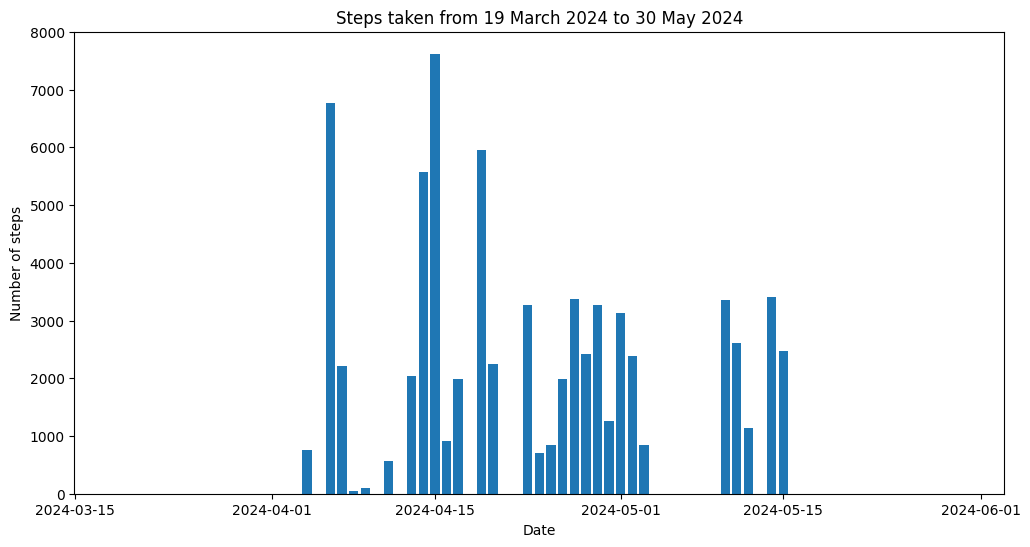

In [148]:
from datetime import datetime
import matplotlib.pyplot as plt

def convert_milliseconds_to_date(var_timestamp):
  """
  Converts milliseconds to a datetime object.
  """
  seconds = var_timestamp // 1000
  return datetime.fromtimestamp(seconds)

def sort_by_datetime(data, reverse=False):
  """
  Sorts a dictionary by the datetime key in ascending order.
  """
  return dict(sorted(data.items(), key=lambda item: item[0], reverse=reverse))

def process_adherence_data(data):
  """
  Processes adherence data to calculate adherence counts and rates.

  Args:
      data: A list of adherence records.

  Returns:
      A dictionary containing total data points, worn count, not worn count, 
      and adherence rate.
  """
  total_count = 0
  worn_count = 0
  not_worn_count = 0
  for item in data:
    for record in item:
      for entry in record['dataset']:
        total_count += 1
        if 'point' in entry and len(entry['point'])>0:
          for datapoint in entry['point']:
            # if datapoint['dataTypeName'] == 'com.google.step_count.delta':
              # check for missing data or set a threshold for adherence based on step count
            if 'intVal' in datapoint['value'][0]:
              worn_count += 1
        else:
          not_worn_count += 1
  adherence_rate = (worn_count / total_count) * 100
  return {
      "total_count": total_count,
      "worn_count": worn_count,
      "not_worn_count": not_worn_count,
      "adherence_rate": adherence_rate
  }

def prepare_data_for_plot(data):
  """
  Prepares adherence data for plotting timestamps and adherence values.

  Args:
      data: A list of adherence records.

  Returns:
      A `results` dictionary containing a datetime and intVal key-value pair
  """
  results = {}
  for record in data:
    for item in record:
      # print(item)
      startTimeMillis = int(item['startTimeMillis'])
      datetime_value = convert_milliseconds_to_date(startTimeMillis)
      for entry in item['dataset']:
        if 'point' in entry and len(entry['point'])>0:
          for datapoint in entry['point']:
            # check for missing data or set a threshold for adherence based on step count
            if 'intVal' in datapoint['value'][0]:
              results[datetime_value] = datapoint['value'][0]['intVal']
        else:
          # for no adherence taken
          results[datetime_value] = 0
  return sort_by_datetime(results)

# process data to get adherence stats
results = process_adherence_data(steps_adherence)

# create adherence table
print("Participant Adherence:")
print(f"Total Data Points: {results['total_count']}")
print(f"Worn Count: {results['worn_count']}")
print(f"Not Worn Count: {results['not_worn_count']}")
print(f"Adherence Rate: {results['adherence_rate']:.2f}%")

# Prepare data for plotting
adherence_by_dates = prepare_data_for_plot(steps_adherence)

# Plot adherence over time
plt.figure(figsize=(12, 6))
dates = list(adherence_by_dates.keys())
adherence = list(adherence_by_dates.values())
plt.bar(dates, adherence)
plt.xlabel("Date")
plt.ylabel("Number of steps")
plt.title(f"Steps taken from {dates[0].strftime('%d %B %Y')} to {dates[-1].strftime('%d %B %Y')}")
plt.show()

Regions with no data are assumed to be non-adherence days (days in which the participant does not wear the device). 

# 5. Visualizing participant activity
<div style="display:flex; flex-direction:column; justify-content:flex-start">
    <img src='https://i.imgur.com/3bRYLZ2.png' width="550" height="400">
</div>

In this section, we'll explore some more visualizations with Matplotlib. We'll focus on re-creating the BPM (Beats Per Minute) graph in the Zepp ,mobile app as shown in the graph above. This type of graph is useful for observing trends and variations in a participant's heart rate.

The screenshot depicts a line graph with the following elements:
* **X-axis:** Represents dates.
* **Y-axis:** Represents the measured values (heart rate in beats per minute - BPM).
* **Line:** Connects data points, showing the heart rate variation over time.
* **Title:** Provides a clear description of the graph's content (Heart Rate Over Time).

By understanding these elements and using Matplotlib's functions, we can create informative visualizations to effectively communicate insights from the data we have extracted.

list index out of range
list index out of range


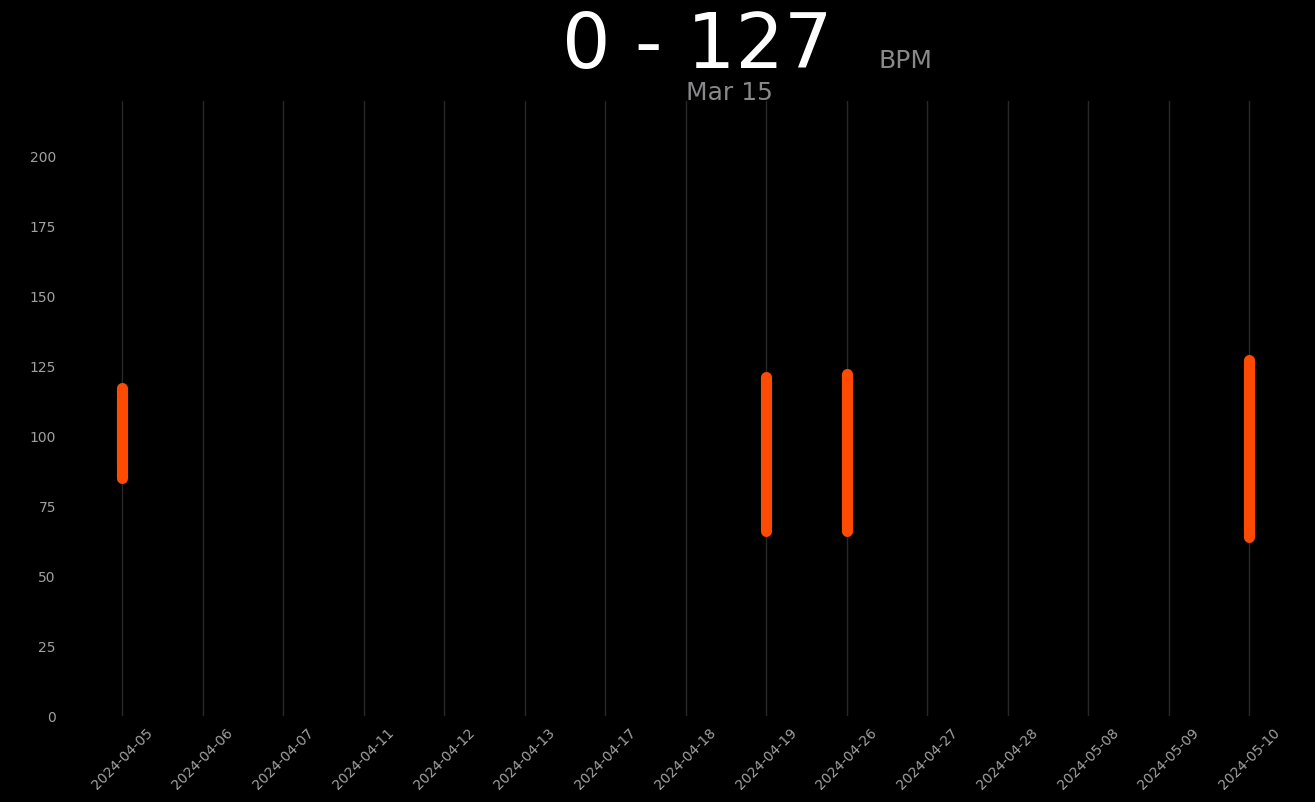

In [149]:
import numpy as np
from datetime import date, datetime
import pandas as pd
import matplotlib.pyplot as plt


def clean_consecutive_empty_dates(data_dict, batch_size=3):
    """
    Clean consecutive empty dates so we don't have long 
    periods of empty days to look at
    """
    cleaned_dict = {}
    for i, key in enumerate(data_dict.keys()):
        if i % batch_size == 0:  # check if we are at the start of a new batch
            current_batch = {}
        current_batch[key] = data_dict[key]
        if len(current_batch) == batch_size or i == len(data_dict) - 1:  # process the batch or handle last elements
            # cleaned_dict[]
            if not all(value == (0, 0, 0) for value in current_batch.values()):
                cleaned_dict.update(current_batch)
            current_batch = {}
    return cleaned_dict

# Creating a dictionary to save all the heart rate values with the dates
heartrate_dict = {}

# Saving the end and start dates in a date format from the inputted strings
start_date_object = date(int(start_date.split('-')[0]), int(start_date.split('-')[1]),
                         int(start_date.split('-')[2]))
end_date_object = date(int(end_date.split('-')[0]), int(end_date.split('-')[1]),
                       int(end_date.split('-')[2]))

date_range_text = start_date_object.strftime("%B")[:3] + ' ' + str(start_date_object.day)

# Finding the list of all dates between our start and end dates
dates = list(pd.date_range(start_date_object, end_date_object, freq='D'))

# Traversing through each entry in our DataFrame to save heart rate values for each date
for i in range(len(heart_rate_adherence)):
    try:
        heartrate_dict[datetime.fromtimestamp(
            int(heart_rate_adherence[i][0]['startTimeMillis']) // 1000).strftime('%Y-%m-%d')] = (
            int(np.ceil(heart_rate_adherence[i][0]['dataset'][0]['point'][0]['value'][0]['fpVal'])),
            int(np.ceil(heart_rate_adherence[i][0]['dataset'][0]['point'][0]['value'][1]['fpVal'])),
            int(np.ceil(heart_rate_adherence[i][0]['dataset'][0]['point'][0]['value'][2]['fpVal'])))
    except Exception as error:
        print(str(error))
        continue

# Creating a dictionary to save all the heart rate values with the dates between the specific end and start dates
heartrate_dict_daily = {}

# Traversing each date for all the dates between start and end
for date_val in dates:
    # Initializing each date with (0,0,0)
    heartrate_dict_daily[date_val.strftime('%Y-%m-%d')] = (0, 0, 0)
    # Saving actual high, low, and avg values for dates that have data available
    for key in heartrate_dict.keys():
        if date_val.strftime('%Y-%m-%d') == key:
            heartrate_dict_daily[date_val.strftime('%Y-%m-%d')] = heartrate_dict[key]

heartrate_dict_daily = clean_consecutive_empty_dates(heartrate_dict_daily)

# This will help us find the low to max heart rate values for our chart header
bpm_range = str(min([i[2] for i in heartrate_dict_daily.values()])) + ' - ' + str(max([i[1] for i in heartrate_dict_daily.values()]))

# Initializing the figure
plt2 = plt.figure(figsize=(16, 8), facecolor='black')
ax = plt.gca()
ax.set_facecolor('#000000')

# Plotting the values
x = [key for key in list(heartrate_dict_daily.keys())]
y = list(heartrate_dict_daily.values())
plt.plot((range(len(x)),range(len(x))), ([i[1] for i in y], [i[2] for i in y]), c='#FD4B03',lw=8, solid_capstyle='round')

# Setting y limit to the chart
plt.ylim(0, 220)

# Setting x and y ticks
plt.xticks(range(len(x)), x, rotation=45, color="#a1a1a1")
plt.yticks(color="#a1a1a1")

# Setting labels
plt.ylabel('Heart Rate')

# Creating grid lines
plt.grid(axis='x', color="#a1a1a1", linestyle='-', linewidth=1, alpha=0.25)

# Adding Heart header
plt.text(0.52, 0.92, bpm_range, fontsize=55, transform=plt2.transFigure, horizontalalignment='center', color='white')
plt.text(0.65, 0.92, 'BPM', fontsize=18, transform=plt2.transFigure, horizontalalignment='center', color='#89898B')
plt.text(0.54, 0.88, date_range_text, fontsize=18, color='#89898B', transform=plt2.transFigure, horizontalalignment='center', weight='light')

plt.show()
